## Application 1

In [1]:
import DSGRN
import Berry_2019_figures_results as Berry
from min_interval_posets import posets, poset_distance
from copy import deepcopy
from IPython import display
import matplotlib.pyplot as plt
from importlib import reload
%matplotlib inline

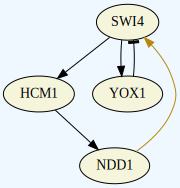

In [2]:
wavepool = DSGRN.Network("good_wavepool.txt")
swapped = DSGRN.Network("bad_wavepool.txt")
DSGRN.DrawGraph(wavepool)

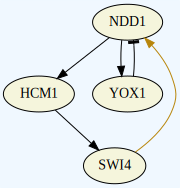

In [3]:
DSGRN.DrawGraph(swapped)

In [4]:
wt1_file = "WT1_WT2_microarray_interpolated/wt1_microarray_coregenes_lifepoints_interpol_trim.csv"
wt2_file = "WT1_WT2_microarray_interpolated/wt2_microarray_coregenes_lifepoints_interpol.csv"
epsilons = [0.0, 0.01,0.04,0.05,0.06,0.08,0.09,0.1,0.14,0.15]
names = ["YOX1","SWI4","HCM1","NDD1"]
posets1 = Berry.getposets(wt1_file,"row",epsilons,names=names)
posets2 = Berry.getposets(wt2_file,"row",epsilons,names=names)

In [5]:
# graph data
def make_fig(fname,savename,start_time=None,end_time=None,names=None):
    curves = Berry.row(fname)
    subset_curves = deepcopy(curves)
    if names is not None:
        for name in curves:
            if name not in names:
                subset_curves.pop(name)
    for name,curve in subset_curves.items():
        n = curve.normalize()
        if start_time is not None and end_time is not None:
            n = curve.trim(start_time,end_time)
        times,vals = zip(*n.items())
        plt.plot(times,vals,label=name)
    lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.ylabel("normalized expression")
    plt.xlabel("times")
    plt.savefig(savename,bbox_extra_artists=(lgd,), bbox_inches='tight') 
    display.display(plt.show())
    

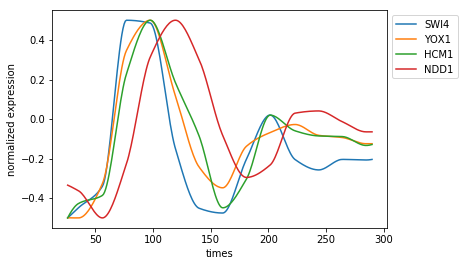

None

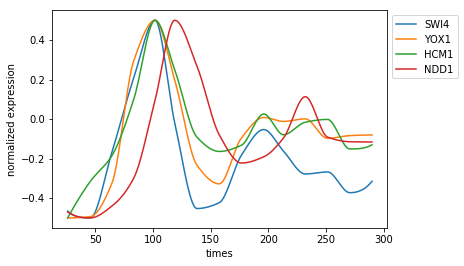

None

In [6]:
make_fig(wt1_file,"time_series_rep1.pdf",names=names)
make_fig(wt2_file,"time_series_rep2.pdf",names=names)

In [7]:
def make_posets(p,network):
    events = list(p[1][0])
    event_ordering = list(p[1][1]) 
    poe = DSGRN.PosetOfExtrema(network, events, event_ordering)
    return poe,len(events)

In [8]:
def create_pattern_graph(poset,network):
    eps = poset[0]
    poe,_ = make_posets(poset,network)
    return DSGRN.PatternGraph(poe),eps

In [9]:
def create_search_graph(param):
    domain_graph = DSGRN.DomainGraph(param)
    return DSGRN.SearchGraph(domain_graph)  

In [10]:
def get_matches(posets,network):
    param_matches = {}
    parameter_graph = DSGRN.ParameterGraph(network)
    for poset in posets:
        pattern_graph,eps = create_pattern_graph(poset,network)
        param_matches[eps] = []
        for pind in range(parameter_graph.size()):
            parameter = parameter_graph.parameter(pind)
            search_graph = create_search_graph(parameter)
            matching_graph = DSGRN.MatchingGraph(search_graph, pattern_graph)
            path_match = DSGRN.PathMatch(matching_graph)
            if path_match:
                param_matches[eps].append(pind)
    return param_matches

In [11]:
wavepool1_parameter_matches=get_matches(posets1,wavepool)
wavepool2_parameter_matches=get_matches(posets2,wavepool)
swapped11_parameter_matches=get_matches(posets1,swapped)
swapped12_parameter_matches=get_matches(posets2,swapped)

for eps in epsilons:
    print("Epsilon = {}".format(eps))
    print("Number of matches in rep 1, wavepool: {}".format(len(wavepool1_parameter_matches[eps])))
    print("Number of matches in rep 2, wavepool: {}".format(len(wavepool2_parameter_matches[eps])))
    print("Number of matches in rep 1, swapped: {}".format(len(swapped11_parameter_matches[eps])))
    print("Number of matches in rep 2, swapped: {}".format(len(swapped12_parameter_matches[eps])))


Epsilon = 0.0
Number of matches in rep 1, wavepool: 0
Number of matches in rep 2, wavepool: 0
Number of matches in rep 1, swapped: 0
Number of matches in rep 2, swapped: 0
Epsilon = 0.01
Number of matches in rep 1, wavepool: 22
Number of matches in rep 2, wavepool: 0
Number of matches in rep 1, swapped: 0
Number of matches in rep 2, swapped: 0
Epsilon = 0.04
Number of matches in rep 1, wavepool: 22
Number of matches in rep 2, wavepool: 22
Number of matches in rep 1, swapped: 0
Number of matches in rep 2, swapped: 0
Epsilon = 0.05
Number of matches in rep 1, wavepool: 12
Number of matches in rep 2, wavepool: 22
Number of matches in rep 1, swapped: 0
Number of matches in rep 2, swapped: 0
Epsilon = 0.06
Number of matches in rep 1, wavepool: 12
Number of matches in rep 2, wavepool: 12
Number of matches in rep 1, swapped: 0
Number of matches in rep 2, swapped: 0
Epsilon = 0.08
Number of matches in rep 1, wavepool: 42
Number of matches in rep 2, wavepool: 12
Number of matches in rep 1, swap

In [12]:
for (p,q) in zip(posets1,posets2):
    print("Number of extrema is {},{} for replicates 1,2 at epsilon {}".format(len(p[1][0]),len(q[1][0]),p[0]))

Number of extrema is 28,32 for replicates 1,2 at epsilon 0.0
Number of extrema is 22,26 for replicates 1,2 at epsilon 0.01
Number of extrema is 21,20 for replicates 1,2 at epsilon 0.04
Number of extrema is 20,20 for replicates 1,2 at epsilon 0.05
Number of extrema is 19,19 for replicates 1,2 at epsilon 0.06
Number of extrema is 18,19 for replicates 1,2 at epsilon 0.08
Number of extrema is 17,18 for replicates 1,2 at epsilon 0.09
Number of extrema is 17,17 for replicates 1,2 at epsilon 0.1
Number of extrema is 16,16 for replicates 1,2 at epsilon 0.14
Number of extrema is 16,16 for replicates 1,2 at epsilon 0.15


Replicate 1, eps 0.15


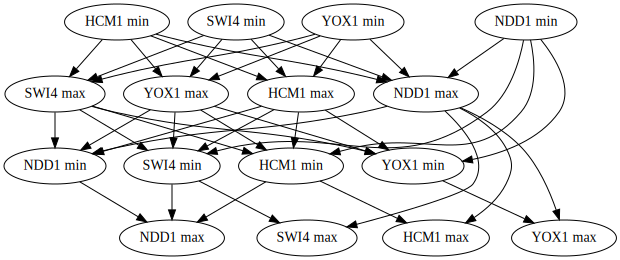

Replicate 2, eps 0.15


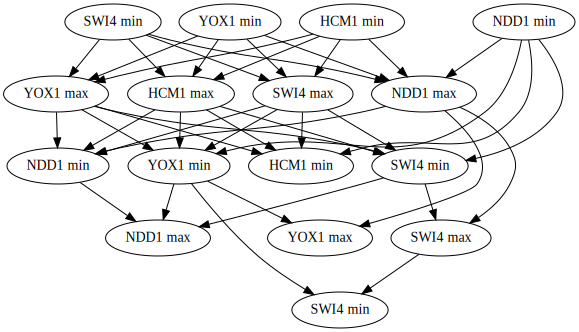

Replicate 1, eps 0.0


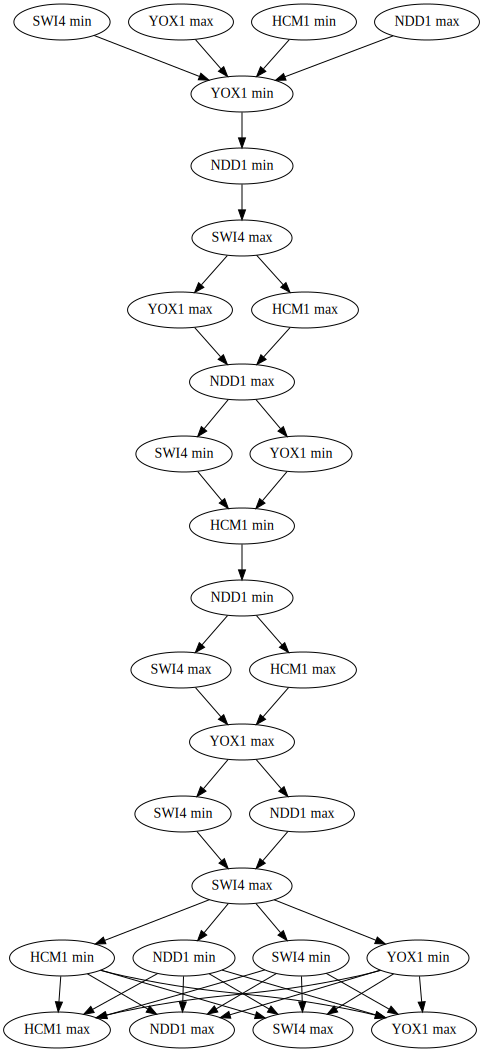

Replicate 1, eps 0.01


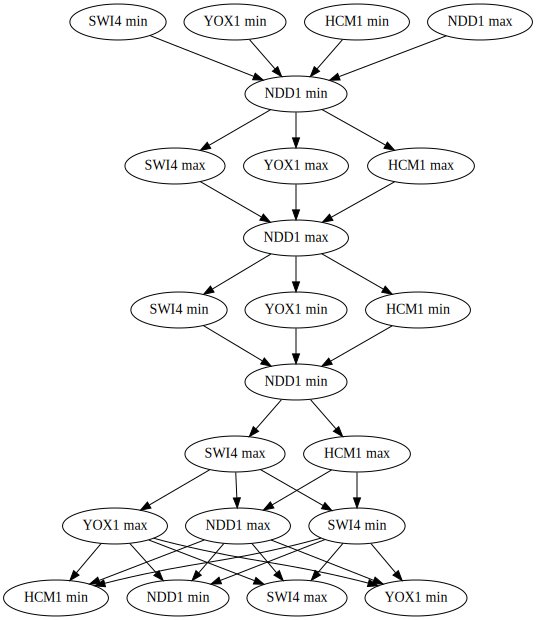

Replicate 1, eps 0.04


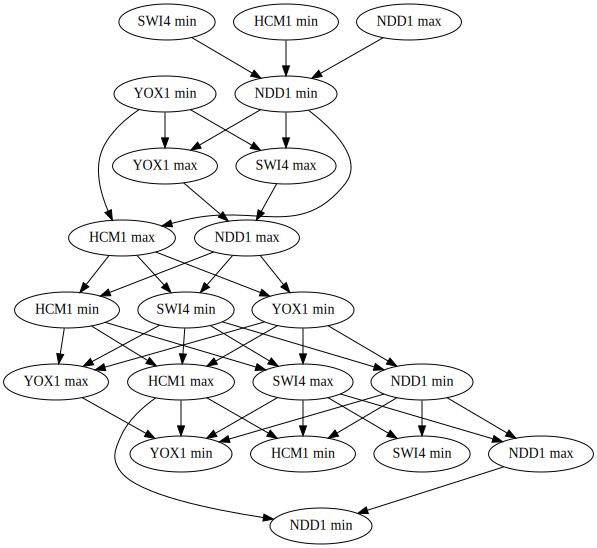

In [13]:
# example poset between reps 1 and 2
# notice that even with the same number of extrema, the identity of the nodes vary
print("Replicate 1, eps 0.15")
poe, N = make_posets(posets1[-1],wavepool)
display.display(DSGRN.DrawGraph(poe))
with open("example_poset.dot","w") as f:
    f.write(poe.graphviz())
print("Replicate 2, eps 0.15")
poe, N = make_posets(posets2[-1],wavepool)
display.display(DSGRN.DrawGraph(poe))
print("Replicate 1, eps 0.0")
poe, N = make_posets(posets1[0],wavepool)
display.display(DSGRN.DrawGraph(poe))
with open("example_poset0.dot","w") as f:
    f.write(poe.graphviz())
print("Replicate 1, eps 0.01")
poe, N = make_posets(posets1[1],wavepool)
display.display(DSGRN.DrawGraph(poe))
print("Replicate 1, eps 0.04")
poe, N = make_posets(posets1[2],wavepool)
display.display(DSGRN.DrawGraph(poe))


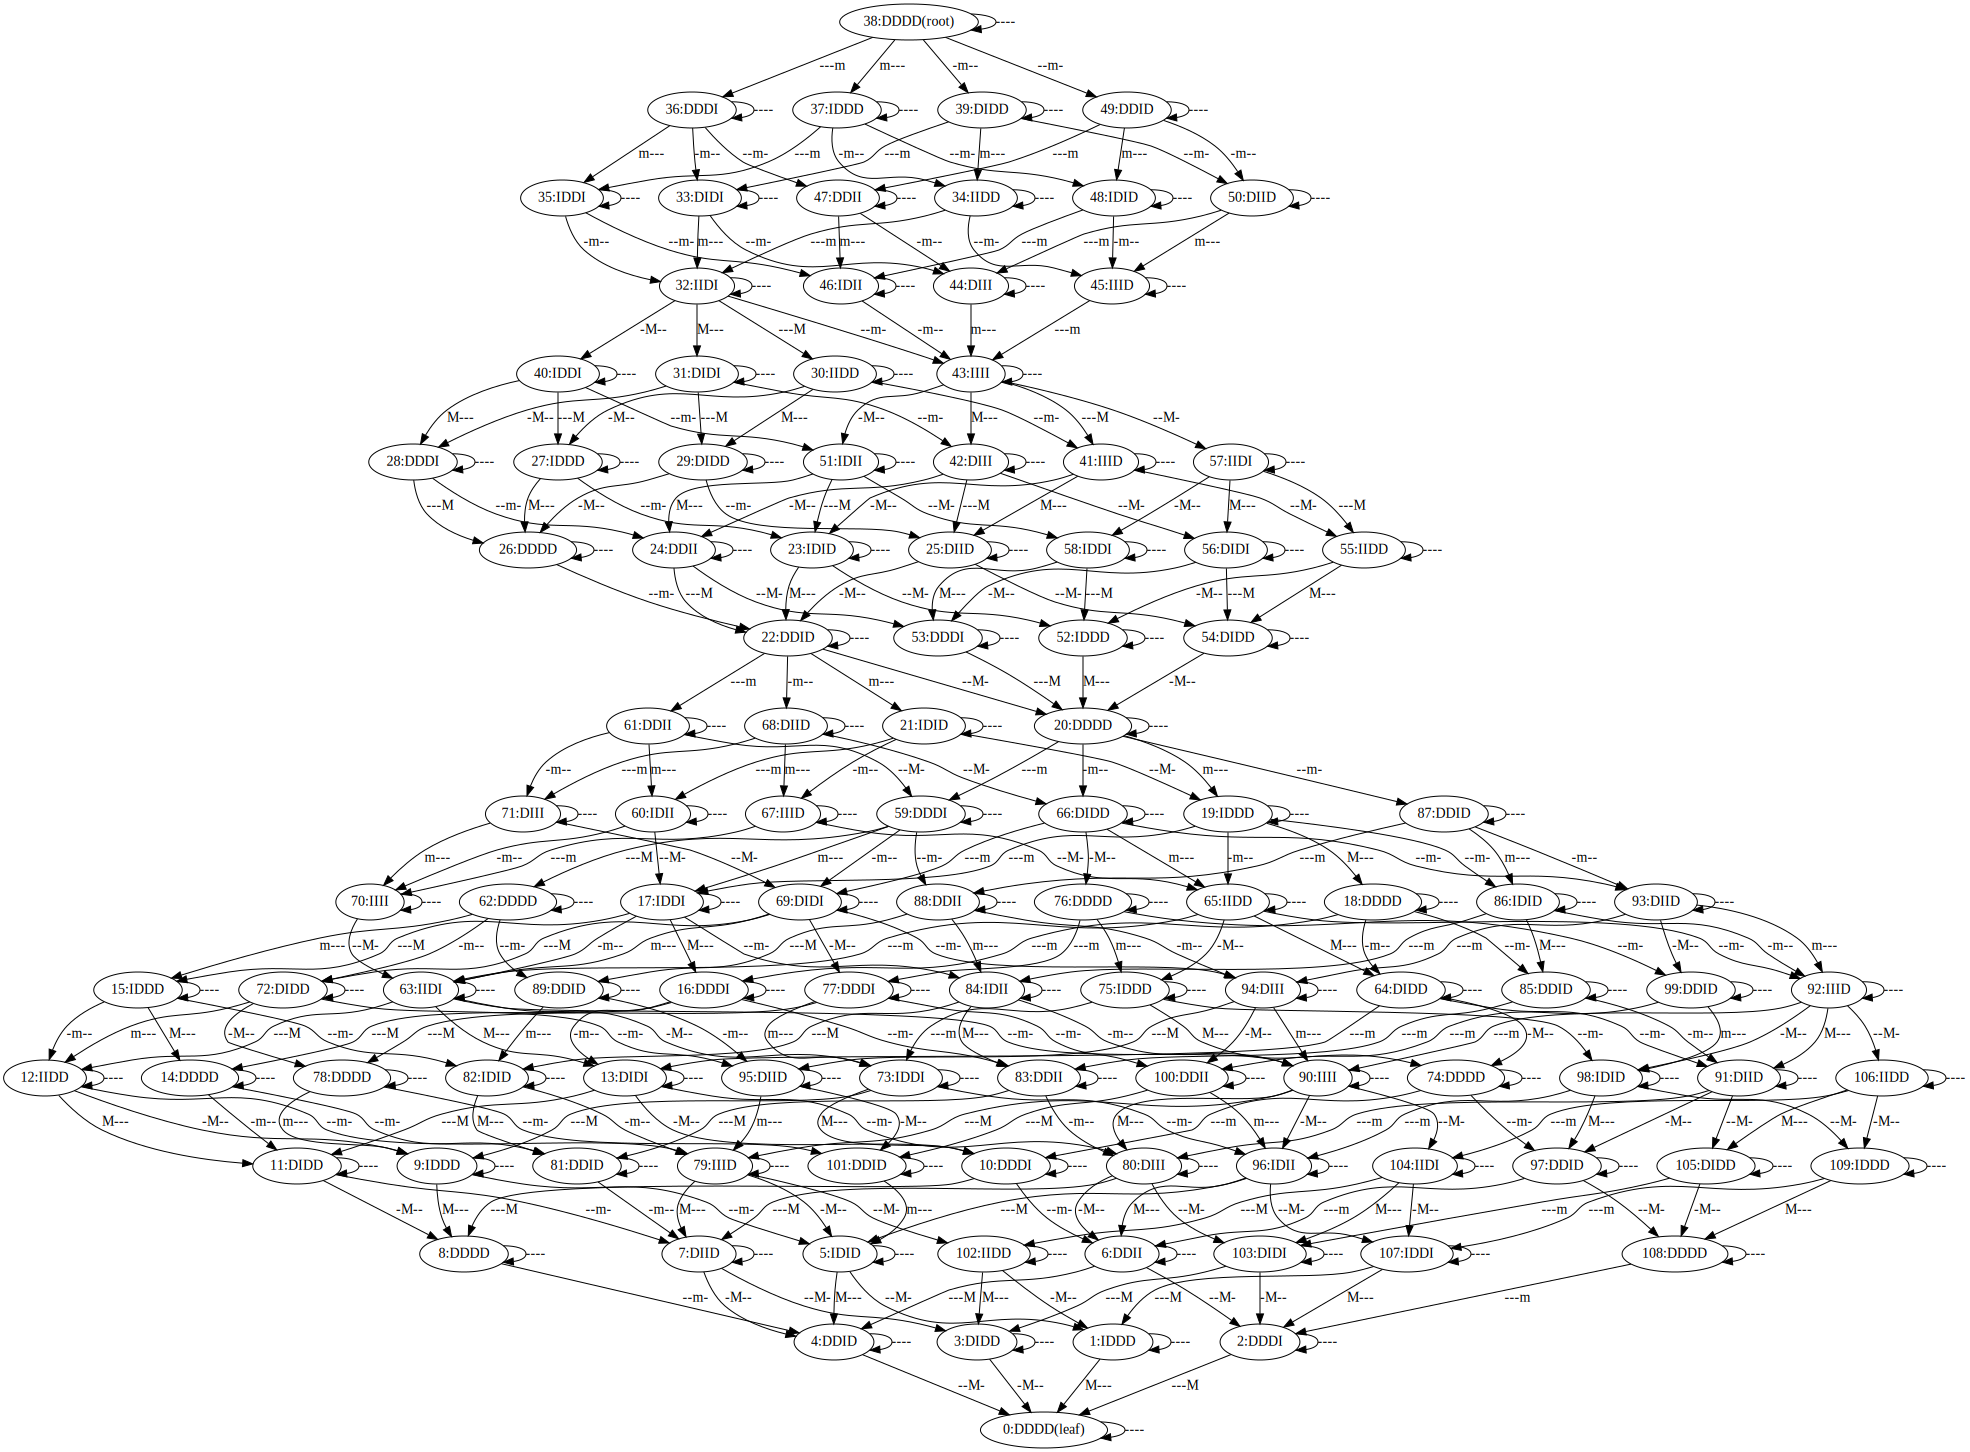

In [14]:
# example pattern graph
pattern_graph,_ = create_pattern_graph(posets1[-1],wavepool)
with open("example_pattern_graph.dot","w") as f:
    f.write(pattern_graph.graphviz())
DSGRN.DrawGraph(pattern_graph)

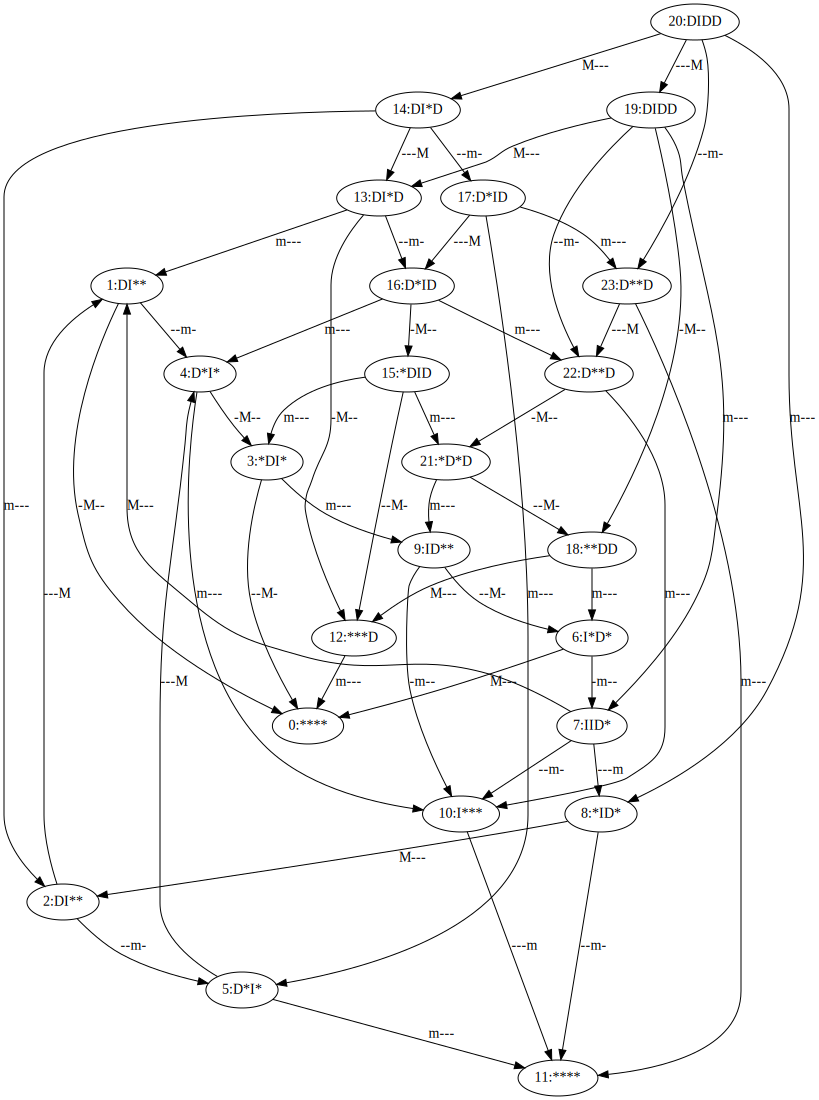

In [15]:
# example search graph
pind = wavepool1_parameter_matches[0.15][0]
parameter_graph = DSGRN.ParameterGraph(wavepool)
param = parameter_graph.parameter(pind)
search_graph = create_search_graph(param)
display.display(DSGRN.DrawGraph(search_graph))
with open("example_search_graph.dot","w") as f:
    f.write(search_graph.graphviz())

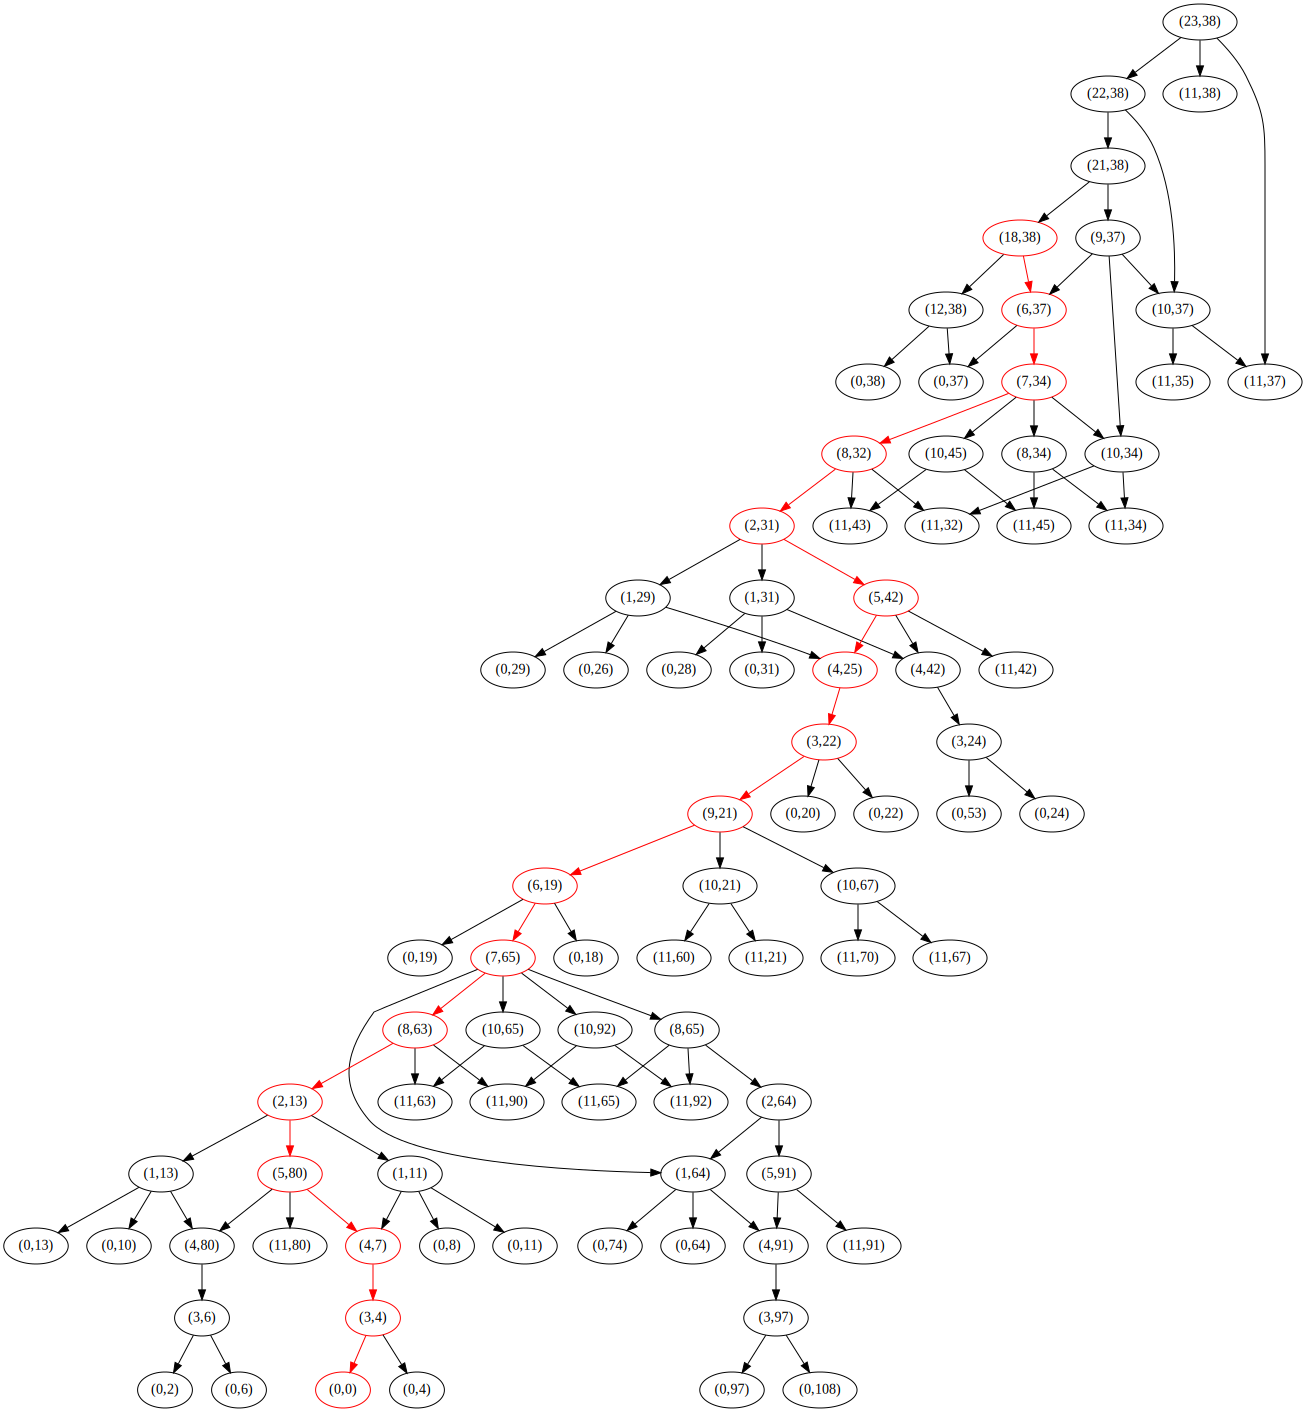

In [16]:
# example matching graph
matching_graph = DSGRN.MatchingGraph(search_graph, pattern_graph)
path_match = DSGRN.PathMatch(matching_graph)
with open("example_matching_graph.dot","w") as f:
    f.write(matching_graph.graphviz_with_highlighted_path(path_match))
DSGRN.DrawGraphWithHighlightedPath(matching_graph, path_match)